### Importing Jupyter notbook packages

In [238]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# # import statsmodels 
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# # import sklearn linear models 

# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge

# from sklearn.model_selection import cross_val_score, train_test_split

# from sklearn.preprocessing import StandardScaler

# from sklearn.metrics import mean_squared_error, r2_score

# import custom functions

%load_ext autoreload
%autoreload 2
import linear_regression as r
import data_cleaning as dc
import visualizations as vz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in data

## Train test split

## Check data integrity (our data does not have)
Check for nulls, unique, zeroes

## Explore data (individual parameters)
Describe data
Visualize data
 - histogram

## Explore data relationships (trends with target and with each other, distribution)
Scatter matrix
Pair plot?? <- when to use this vs. scatter matrix?
collinearity

## Run regression
formula
SKlearn

## Check results
qqplot
scatterplot of residuals (residplot)
scatterplot of residuals against each feature - is there any trend that we can address?

## Change features
Apply all transforms to variabes
 - transpose
 - log
 - exp
 - polynomial
Standardize
Run Ridge and Lasso to see which of these to remove

?? when to run through previous steps?

## Change target
Inverse transform of y-var
 - sigmoid function?  What is that?
Run the above analysis again with transformed y-var
?? Which answers do we want to see here?
 R2, scatter of regression

## Best model evaluation
score(test) for each model
    Show R2 of various versions of our regression
    Show scatterplots of errors for all regression

## Read graduate admissions dataset and Train Test Split

*Source* https://www.kaggle.com/mohansacharya/graduate-admissions/downloads/graduate-admissions.zip/2

In [185]:
admissions_dataset = dc.import_admissions_dataset()

X = admissions_dataset.drop(columns=['Serial_No','Research','Chance_of_Admit'])
y = admissions_dataset[['Chance_of_Admit']]
X_train, X_test, y_train, y_test =  r.train_test_split_fxn(X, y, random_state = 12345, test_size = .2)
print("X_train: {}, X_test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (400, 6), X_test: (100, 6), y_train: (400, 1), y_test: (100, 1)


## Explore data (individual parameters)

In [105]:
# y_train.hist()
# plt.show()
# y_train.describe()

In [106]:
# X_train.hist()
# plt.show()
# X_train.describe()

## Explore data relationships

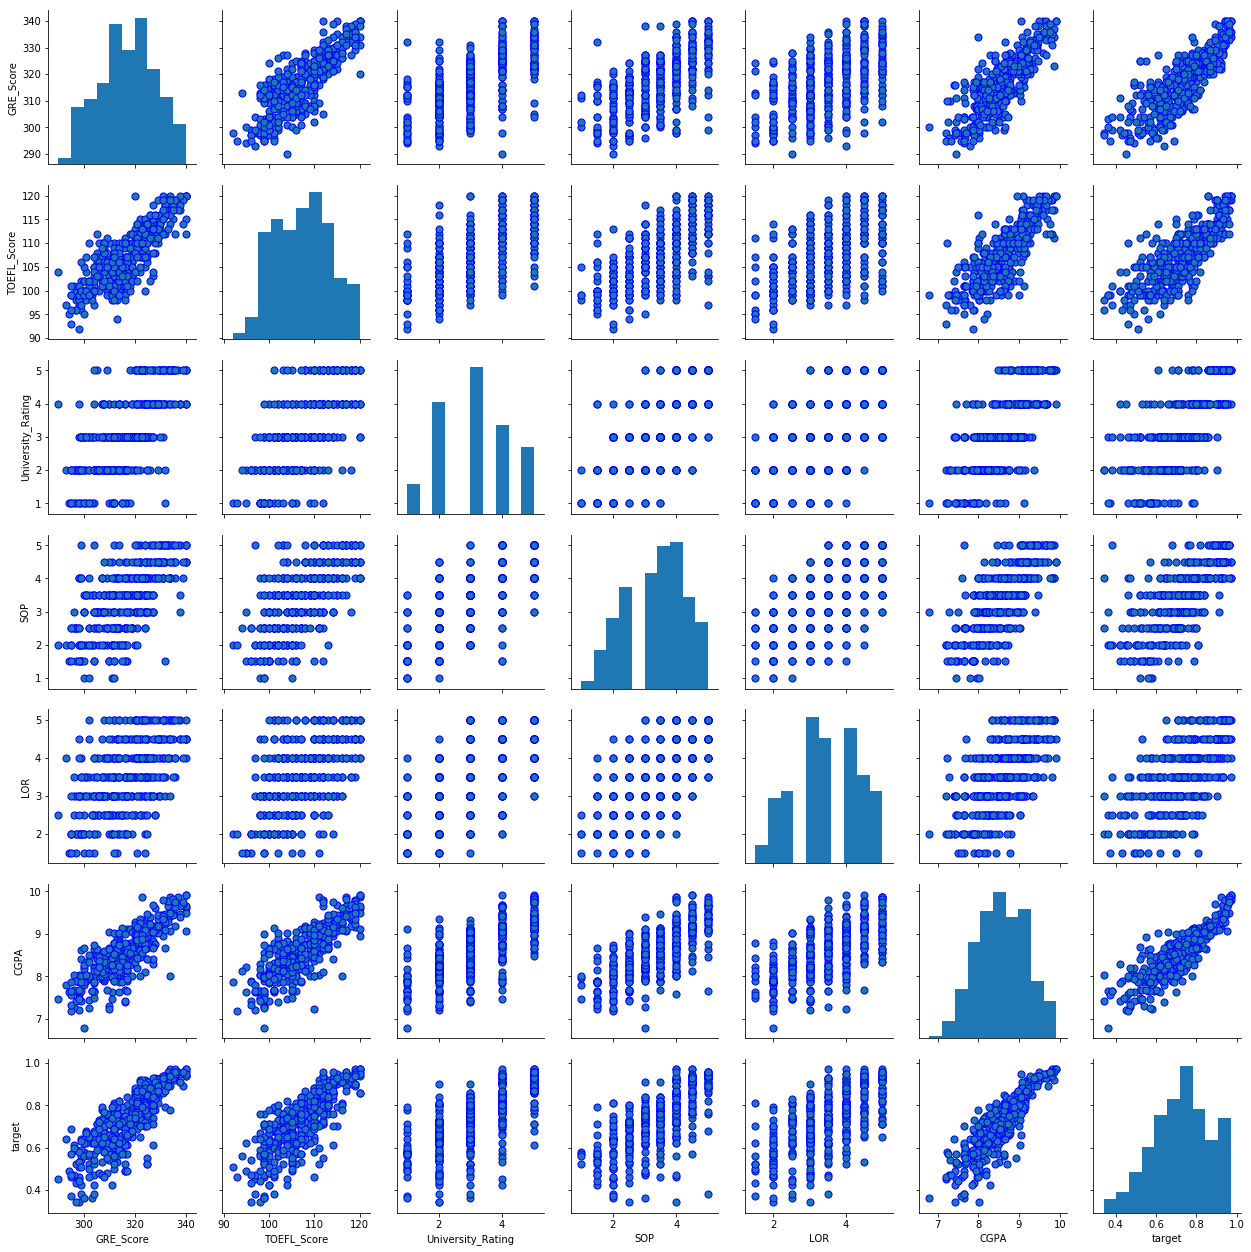

In [186]:
#create a temporary full dataset including target and features for visualization of potential trends
temp_full_df = X_train.copy()
temp_full_df['target'] = y_train

# plt.figure(figsize=(15,15))
sns.pairplot(temp_full_df,
            plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

#features~features: we notice potentially linear relationships between various GRE Score, TOEFL score and CGPA
#categorical features (University ranking, SOP, LOR) also seem to be correlated with other variables
#target~features: target seems to be correlated with all feautres. There may be a non-linear relationship with
#GRE, TOEFL and GRE scores

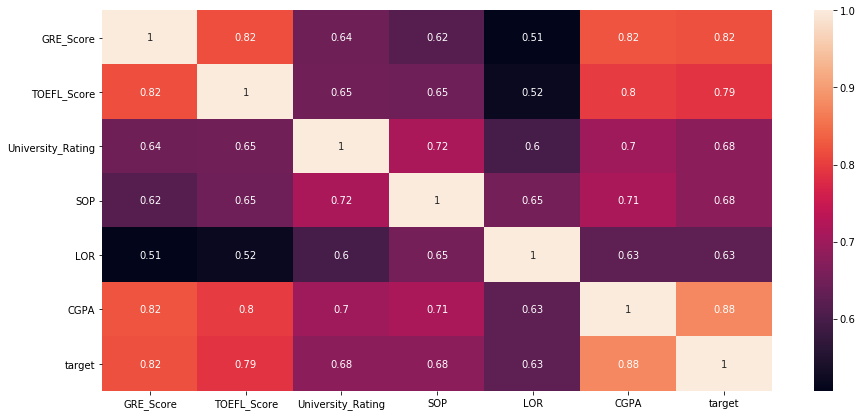

In [188]:
# see heatmap visualization
plt.figure(figsize=(15,7))
sns.heatmap(temp_full_df.corr(),annot = True)
plt.show()


#features~features: various features are corellated with one another - the highest correlation amonst features
#is between CGPA and GRE score (0.82). For the time being we keep all features as our number of features (6)
#remains reasonable for the purposes of student selection and we aim to achieve a high (close to 1) R2
#target~features: target seems to be most correlated with CGPA, GRE score, then TOEFL

In [190]:
temp_full_df.corr().T

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,target
GRE_Score,1.000000,0.817746,0.643475,0.617428,0.506241,0.824167,0.820509
TOEFL_Score,0.817746,1.000000,0.649494,0.645565,0.518661,0.797548,0.789258
University_Rating,0.643475,0.649494,1.000000,0.715971,0.597848,0.701813,0.679056
SOP,0.617428,0.645565,0.715971,1.000000,0.654382,0.714200,0.680343
LOR,0.506241,0.518661,0.597848,0.654382,1.000000,0.626748,0.626950
CGPA,0.824167,0.797548,0.701813,0.714200,0.626748,1.000000,0.878106
target,0.820509,0.789258,0.679056,0.680343,0.626950,0.878106,1.000000


In [191]:
temp_full_df.cov().T

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,target
GRE_Score,120.324054,54.640388,8.088377,6.685150,5.117343,5.436295,1.265126
TOEFL_Score,54.640388,37.105539,4.533647,3.881579,2.911479,2.921377,0.675791
University_Rating,8.088377,4.533647,1.313127,0.809837,0.631328,0.483600,0.109379
SOP,6.685150,3.881579,0.809837,0.974311,0.595238,0.423916,0.094395
LOR,5.117343,2.911479,0.631328,0.595238,0.849223,0.347308,0.081212
CGPA,5.436295,2.921377,0.483600,0.423916,0.347308,0.361595,0.074222
target,1.265126,0.675791,0.109379,0.094395,0.081212,0.074222,0.019758


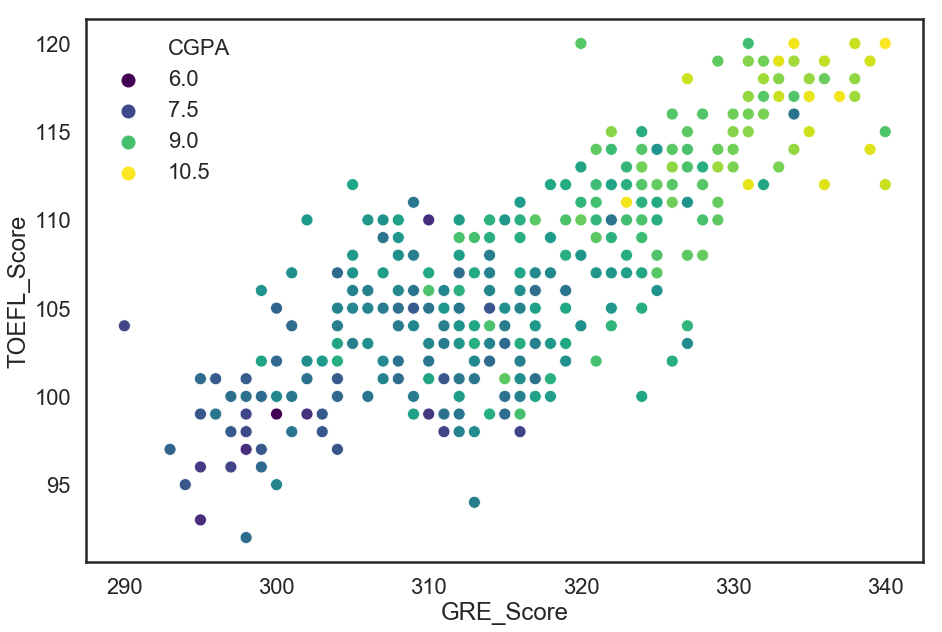

In [240]:
vz.get_scatter_GRE_TOEFL_GCPA(X_train)
#visually observing the correlation between GRE, TOEFL and GCPA

## Run regression

### sm formula OLS regression


formula: target~GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+CGPA 

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     291.1
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          3.26e-141
Time:                        21:58:51   Log-Likelihood:                 556.65
No. Observations:                 400   AIC:                            -1099.
Df Residuals:                     393   BIC:                            -1071.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

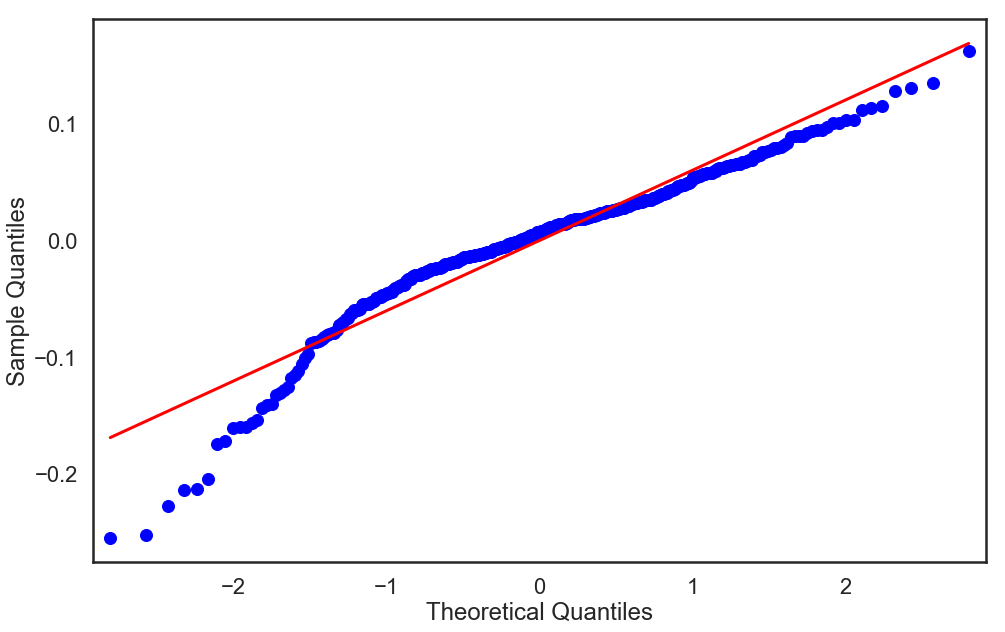

In [241]:
#sm formula OLS regression
model_sm_OLS = r.statsmodel_ols_formula_regression(X_train, y_train, show_resid=True,qqplot_line='s')
#OLS regression result shows us an R2 of 0.816
#residuals appear to be normally distrubtured in the qqplot

### SKlearn OLS

In [356]:
#generate linear regression model with SKlearn
model_sk_learn = r.sklearn_ols_regression(
    X_train,y_train,print_coefficients=True,
    print_resid=True,
    show_resid=False,
    qqplot_line='s'
)

Features:  ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA']
Coefficients:  [[0.00302455 0.00286185 0.00369154 0.00204337 0.01732817 0.11269332]]
y-intercept:  [-1.587]


explained_variance:  0.8163
mean_squared_log_error:  0.0014
r2:  0.8163
MAE:  0.0431
MSE:  0.0036
RMSE:  0.0602


